# Unemployment Analysis with Python

**Context**

The story behind this datasets is how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19.

**Content**

The dataset contains the unemployment rate of all the states in India

Region = states in India

Date = date which the unemployment rate observed

Frequency = measuring frequency (Monthly), which means that the unemployment rate data is recorded and reported on a monthly basis

Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India

Estimated Employed = percentage of people employed

Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force

In [1]:
# importing the required libraries for the analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
df = pd.read_csv(r"D:\Projects\Dataset\Unemployment in India.csv", encoding = 'latin-1')
pd.set_option('display.max_columns', None)
df.head()

,ï»¿Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.shape

(768, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ï»¿Region                                 740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.columns.tolist()

['ï»¿Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Area']

## Data Cleaning and Preprocessing

In [7]:
# To rename multiple columns at once

columns_mapping = {
    'ï»¿Region': 'Region',
    ' Date': 'Date',
    ' Frequency': 'Frequency',
    ' Estimated Unemployment Rate (%)': 'Estimated_Unemployment_Rate_(%)',
    ' Estimated Employed': 'Estimated_Employed',
    ' Estimated Labour Participation Rate (%)': 'Estimated_Labour_Participation_Rate_(%)',
    ' Area': 'Area'
}

# Rename columns using the dictionary
df.rename(columns=columns_mapping, inplace=True)

# Now the columns are renamed according to the mapping in the 'columns_mapping' dictionary
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')

In [8]:
df.head()

,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [9]:
df.tail()

,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# check for empty/null (NaN, NAN, na) values in each column
df.isna().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated_Unemployment_Rate_(%)            28
Estimated_Employed                         28
Estimated_Labour_Participation_Rate_(%)    28
Area                                       28
dtype: int64

In [11]:
null_values = df.isnull().sum().to_frame(name="Empty")
null_values = null_values[null_values["Empty"]>0]
null_values

,Empty
Region,28
Date,28
Frequency,28
Estimated_Unemployment_Rate_(%),28
Estimated_Employed,28
Estimated_Labour_Participation_Rate_(%),28
Area,28


In [12]:
# Drop rows with null values
df.dropna(inplace=True)

In [13]:
df.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated_Unemployment_Rate_(%)            0
Estimated_Employed                         0
Estimated_Labour_Participation_Rate_(%)    0
Area                                       0
dtype: int64

The null values are removed from the dataframe.

## Exploratory Data Analysis

In [27]:
# Summary statistics for numeric columns
numeric_cols = ['Estimated_Unemployment_Rate_(%)', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)']
print(df[numeric_cols].describe())

       Estimated_Unemployment_Rate_(%)  Estimated_Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated_Labour_Participation_Rate_(%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000  


In [48]:
# Count of unique values in the 'Region' column
region_counts = df['Region'].value_counts()
print(region_counts)

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

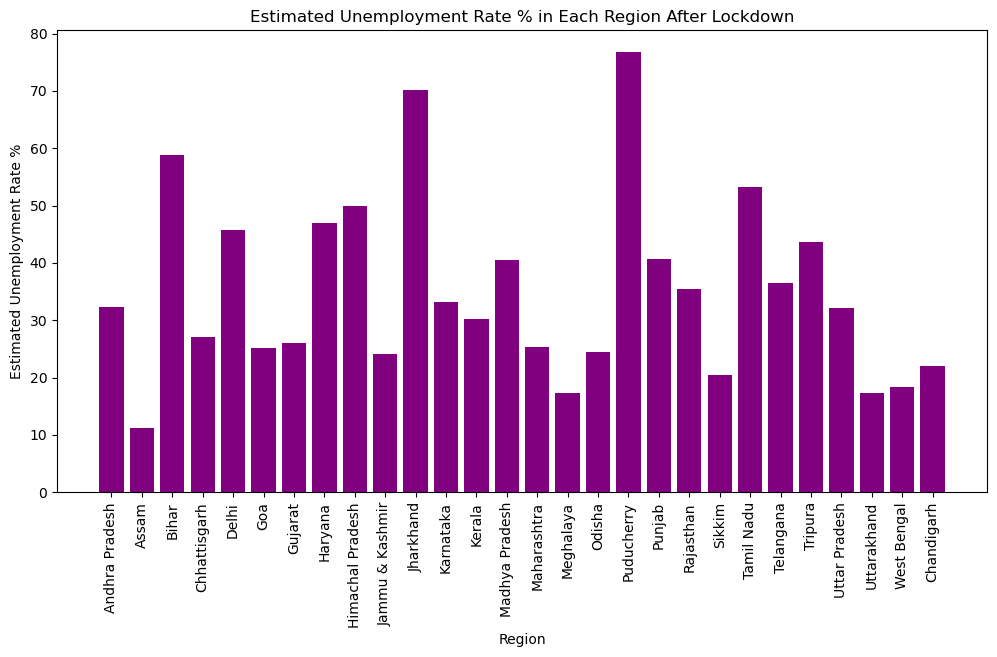

In [80]:
# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(df['Region'], df['Estimated_Unemployment_Rate_(%)'], color='purple')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate %')
plt.title('Estimated Unemployment Rate % in Each Region After Lockdown')
plt.xticks(rotation=90)
plt.show

The Regions with highest Estimated Unemployment Rate % are:
1. Puducherry
2. Jharkhand
3. Bihar
4. Tamil Nadu
5. Himachal Pradesh

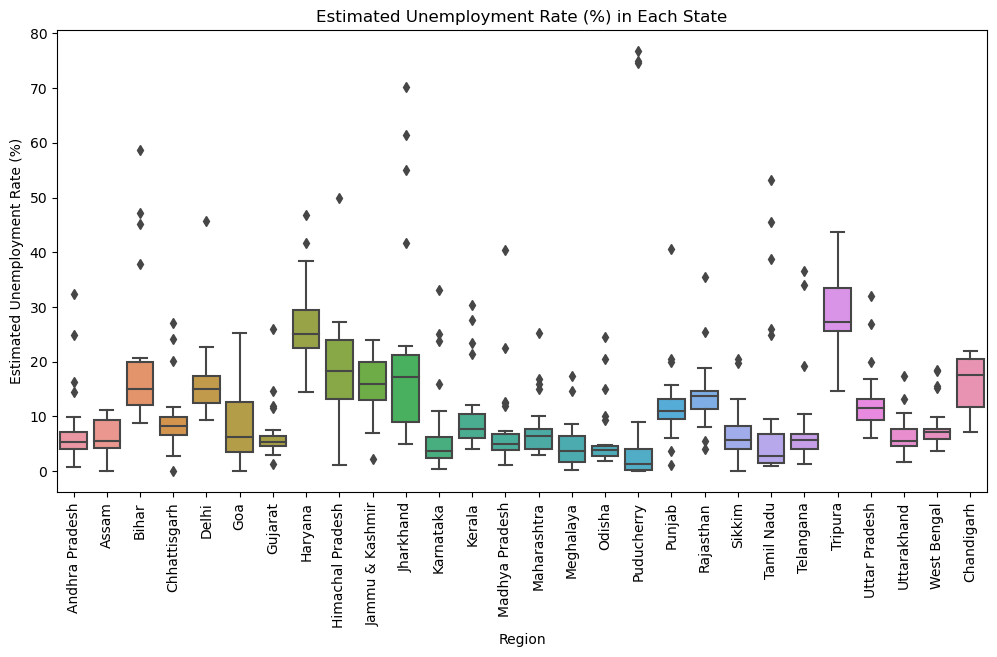

In [76]:
# Compare Estimated Unemployment Rate (%) across different states usign Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Estimated_Unemployment_Rate_(%)')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate (%) in Each State')
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

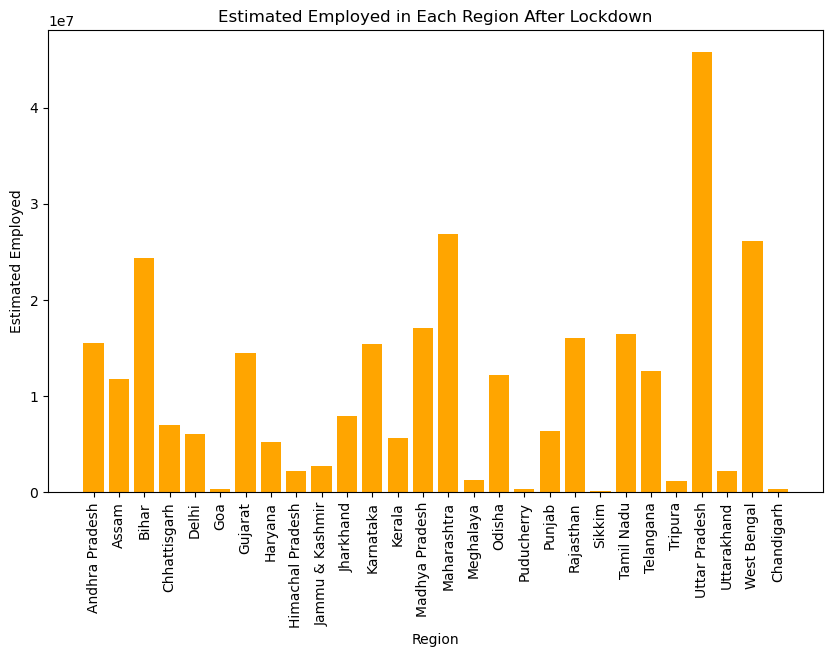

In [63]:
# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Region'], df['Estimated_Employed'], color='orange')
plt.xlabel('Region')
plt.ylabel('Estimated Employed')
plt.title('Estimated Employed in Each Region After Lockdown')
plt.xticks(rotation=90)
plt.show

The Regions with highest Estimated Employed are:
1. Uttar Pradesh
2. Maharashtra
3. West Bengal
4. Bihar
5. Madhya Pradesh

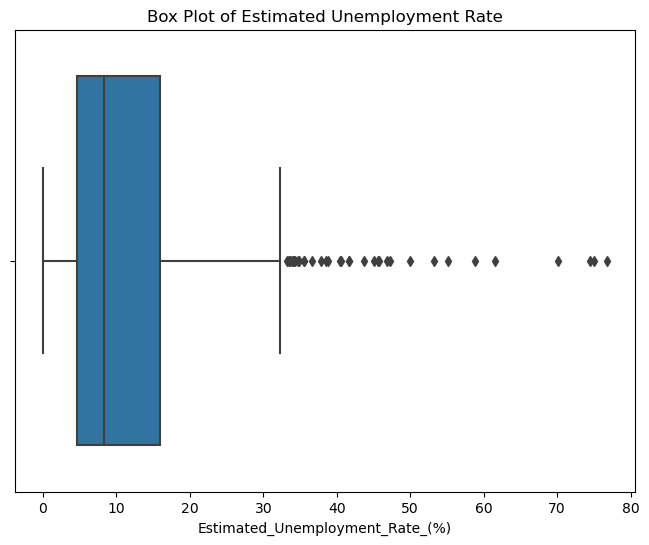

In [30]:
# Box plot to visualize the spread and outliers of Estimated_Unemployment_Rate_(%)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Estimated_Unemployment_Rate_(%)')
plt.xlabel('Estimated_Unemployment_Rate_(%)')
plt.title('Box Plot of Estimated Unemployment Rate')
plt.show()

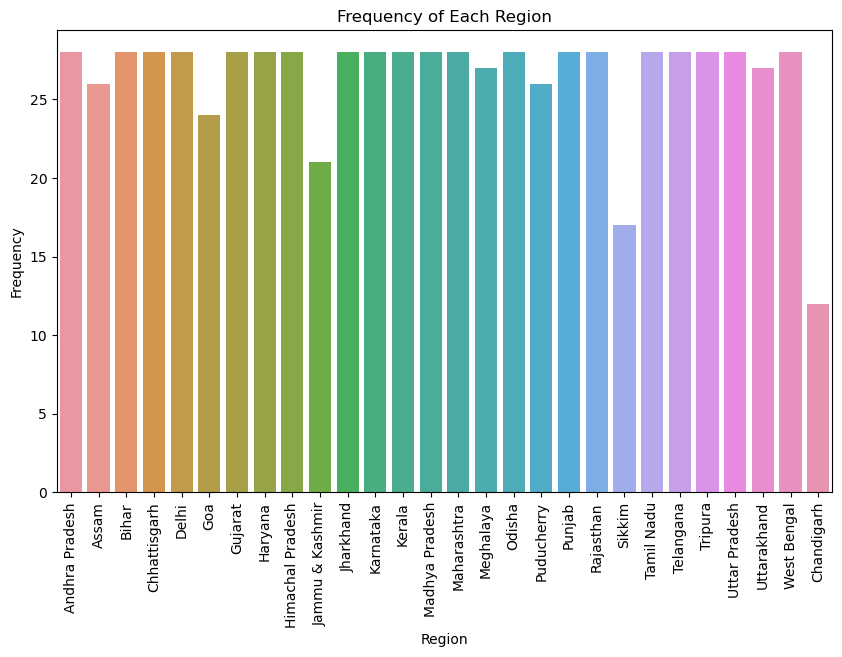

In [36]:
# Count plot to visualize the frequency of each region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Frequency of Each Region')
plt.show()

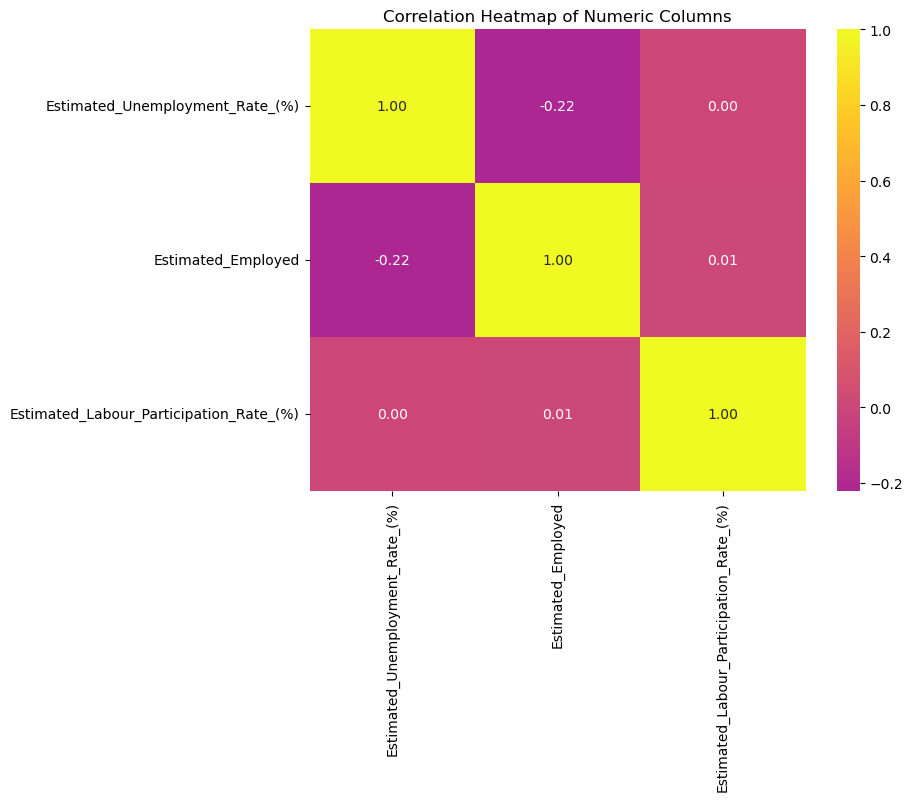

In [70]:
# Correlation heatmap for numeric columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

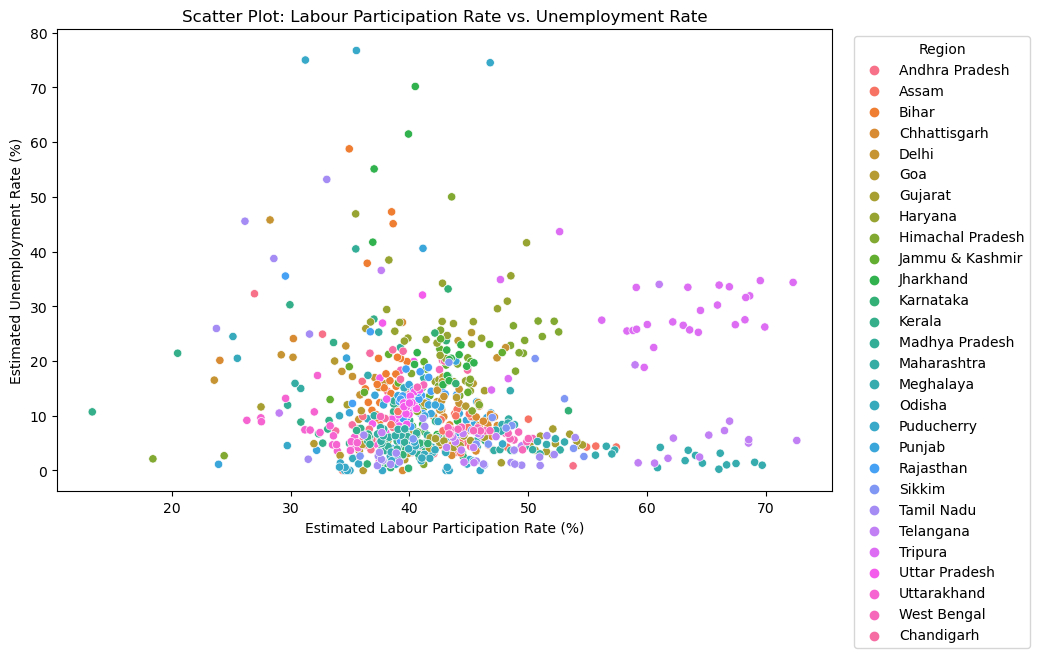

In [64]:
# Scatter plot to explore the relationship between 'Estimated_Labour_Participation_Rate_(%)' and 'Estimated_Unemployment_Rate_(%)'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Estimated_Labour_Participation_Rate_(%)', y='Estimated_Unemployment_Rate_(%)', hue='Region')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Scatter Plot: Labour Participation Rate vs. Unemployment Rate')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1.02, 1))
# The bbox_to_anchor=(1.02, 1) parameter in plt.legend() sets the position of the legend outside the plot.
# The first value (1.02) moves the legend horizontally (beyond the right boundary of the plot) & the second value (1) centers the legend vertically.
plt.show()

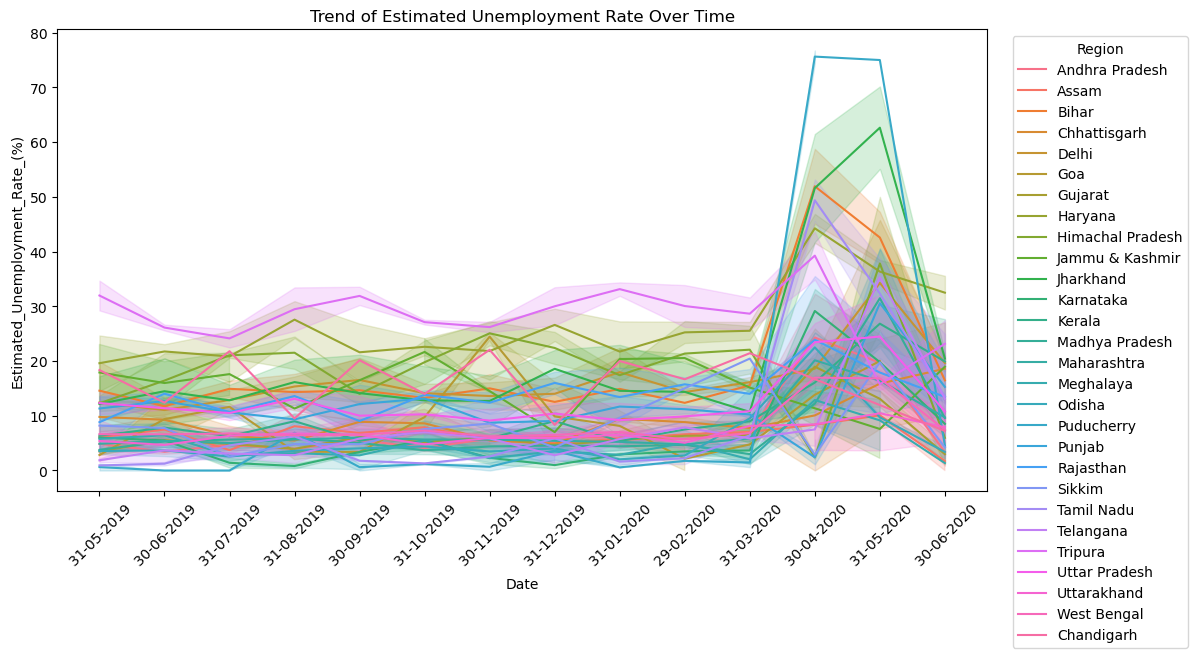

In [83]:
# Time series plot for Estimated_Unemployment_Rate_(%) over Date
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated_Unemployment_Rate_(%)', hue='Region', markers=True)
plt.xlabel('Date')
plt.ylabel('Estimated_Unemployment_Rate_(%)')
plt.title('Trend of Estimated Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()